Explained variance ratio: [0.72962445 0.22850762]


<Figure size 800x600 with 0 Axes>

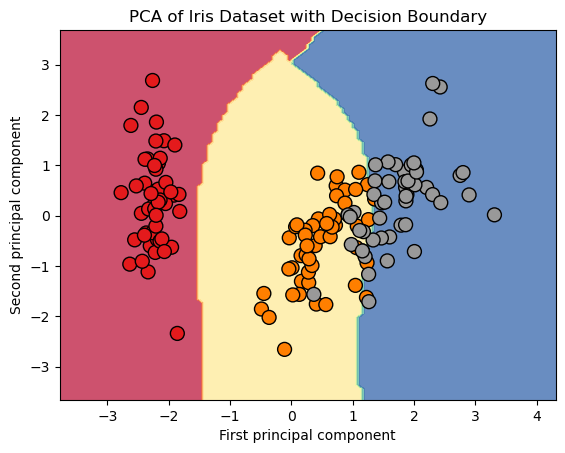

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Train an SVM classifier on the PCA-reduced data
svm = SVC(kernel='poly')
svm.fit(X_pca, y)

# Plot the decision boundary
plt.figure(figsize=(8,6))
DecisionBoundaryDisplay.from_estimator(
    svm, X_pca, response_method="predict", cmap=plt.cm.Spectral, alpha=0.8
)

# Scatter plot of the PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=100)

# Add labels and title
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Iris Dataset with Decision Boundary')

# Show the plot
plt.show()


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis='columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.svm import SVC
svm_model = SVC()

In [34]:
from sklearn.model_selection import GridSearchCV
params = {
    'C':[1,10,100], 'gamma':[0.1,0.01,0.001]
}
svm_tuned = GridSearchCV(svm_model, params, cv=5, verbose=5)

In [35]:
svm_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.875 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.833 total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.01;, score=0.958 total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.01;, score=0.917 total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.01;, score=0.917 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.375 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]},
             verbose=5)

In [40]:
svm_best = svm_tuned.best_estimator_
svm_best

SVC(C=100, gamma=0.01)

In [41]:
svm_best.score(x_test,y_test)

1.0

In [47]:
# pca
# from sklearn.preprocessing import StandardScaler
# stdsc = StandardScaler()
# df2 = stdsc.fit_transform(df)
# df2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
x_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

In [56]:
from sklearn.svm import SVC
svm_model2 = SVC(C=100, gamma=0.01)

# from sklearn.model_selection import GridSearchCV
# params = {
#     'C':[1,10,100], 'gamma':[0.1,0.01,0.001]
# }
# svm_tuned2 = GridSearchCV(svm_model2, params, cv=5, verbose=5)

In [57]:
svm_model2.fit(x_train, y_train)

SVC(C=100, gamma=0.01)

<Figure size 800x600 with 0 Axes>

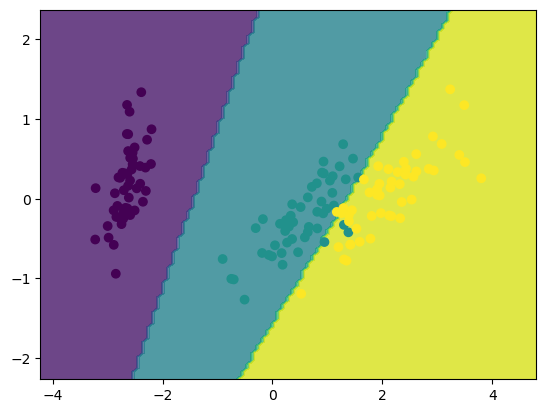

In [64]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(8,6))
DecisionBoundaryDisplay.from_estimator(
    svm_model2, x_pca, cmap=plt.cm.Spectral, alpha=0.8
)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=100)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)